In [ ]:
## Importar librerias 

import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
## Cargamos los datos  

df = pd.read_excel('Datos_201901_202009.xlsx')
print(df.head())

In [ ]:
print(df.describe()) ## (!) campaña tomada como entero

df = df.astype({'CAMPAÑA': str})

In [ ]:
print(df.info())

In [ ]:
print(df.isna().sum())

## Preparacion de los datos 

Se busca analizar las variables y encontrar corelaciones para armar el modelo

*La suma de los pedidos por grupo representa el 30% de las ventas totales

In [ ]:
sns.set(rc={"figure.figsize":(28, 8)}) 

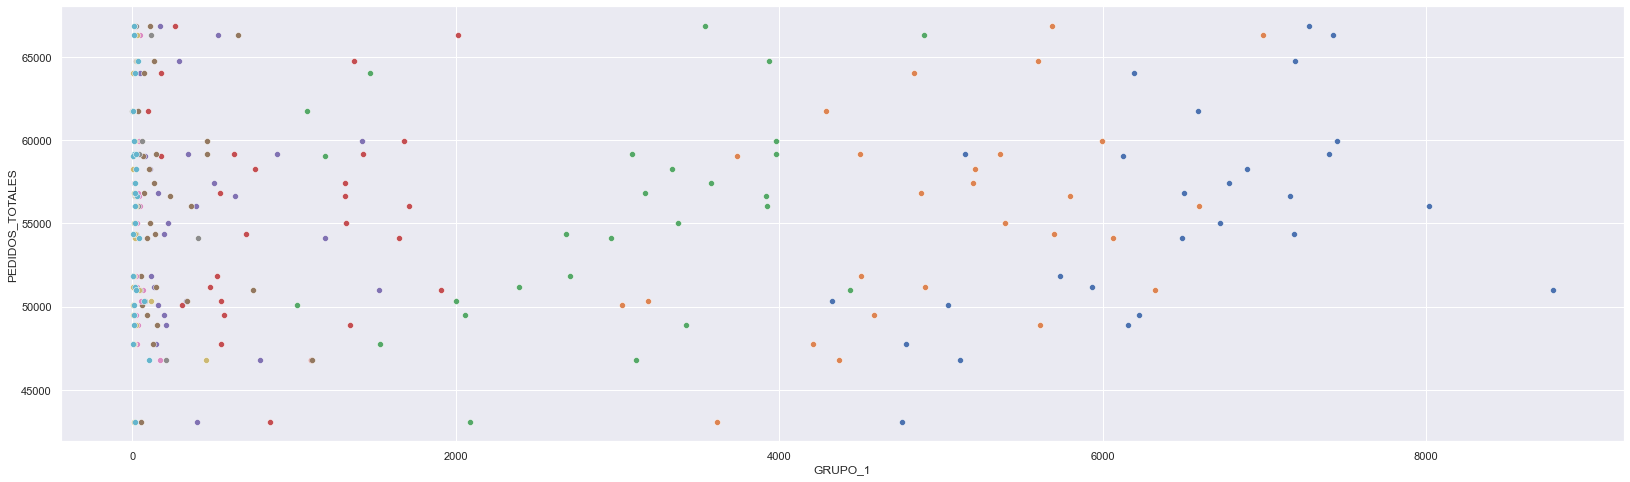

In [217]:
## Se graficaron los pedidos totales para los grupos del 1 al 10
for i in range(1,11):
    sns.scatterplot(data=df, x = f'GRUPO_{i}', y = 'PEDIDOS_TOTALES')

#### Correlación Pearson:

In [ ]:
sns.heatmap(df.corr(method='pearson'), annot=True)

Solo se consideraron las variables con un coeficiente de corelacion mayor a 0.3. Por ende, las Xn para el modelo1 se consideraron como:
- Grupo 1 (corr = 0.53)
- Grupo 2 (corr = 0.45)
- Grupo 3 (corr = 0.31)

In [ ]:
## Se analizó los pedidos totales en funcion a cada campaña 

sns.scatterplot(data=df, x='CAMPAÑA', y= 'PEDIDOS_TOTALES',palette='Set2' ) 

---

In [ ]:
## Se analizaron los pedidos totales por grupo uno a uno para ver la distribucion de los datos 

sns.scatterplot(data=df, x='GRUPO_1', y= f'PEDIDOS_TOTALES',palette='Set2' ) #ok (corr = 0.53)

In [ ]:
sns.scatterplot(data=df, x='GRUPO_2', y= f'PEDIDOS_TOTALES',palette='Set2' ) #ok (corr = 0.45)

In [ ]:
sns.scatterplot(data=df, x='GRUPO_3', y= f'PEDIDOS_TOTALES',palette='Set2' ) #ok

In [ ]:
sns.scatterplot(data=df, x='GRUPO_4', y= f'PEDIDOS_TOTALES',palette='Set2' ) #no

In [ ]:
sns.scatterplot(data=df, x='GRUPO_5', y= f'PEDIDOS_TOTALES',palette='Set2' ) #no

In [ ]:
sns.scatterplot(data=df, x='GRUPO_6', y= f'PEDIDOS_TOTALES',palette='Set2' ) #no

In [ ]:
sns.scatterplot(data=df, x='GRUPO_7', y= f'PEDIDOS_TOTALES',palette='Set2' ) #ok // corr = 0.31

In [ ]:
sns.scatterplot(data=df, x='GRUPO_8', y= f'PEDIDOS_TOTALES',palette='Set2' ) #no

In [ ]:
sns.scatterplot(data=df, x='GRUPO_9', y= f'PEDIDOS_TOTALES',palette='Set2' ) #no

In [ ]:
sns.scatterplot(data=df, x='GRUPO_10', y= f'PEDIDOS_TOTALES',palette='Set2' ) #no // corr = 0.28

---

## Modelamiento de los datos


### Modelo 1:

Y = Pedidos totales

Xn = Grupo1 , Grupo2, Grupo3 


Outcome: predecir los pedidos totales, en función a los pedidos de cada grupo n. 

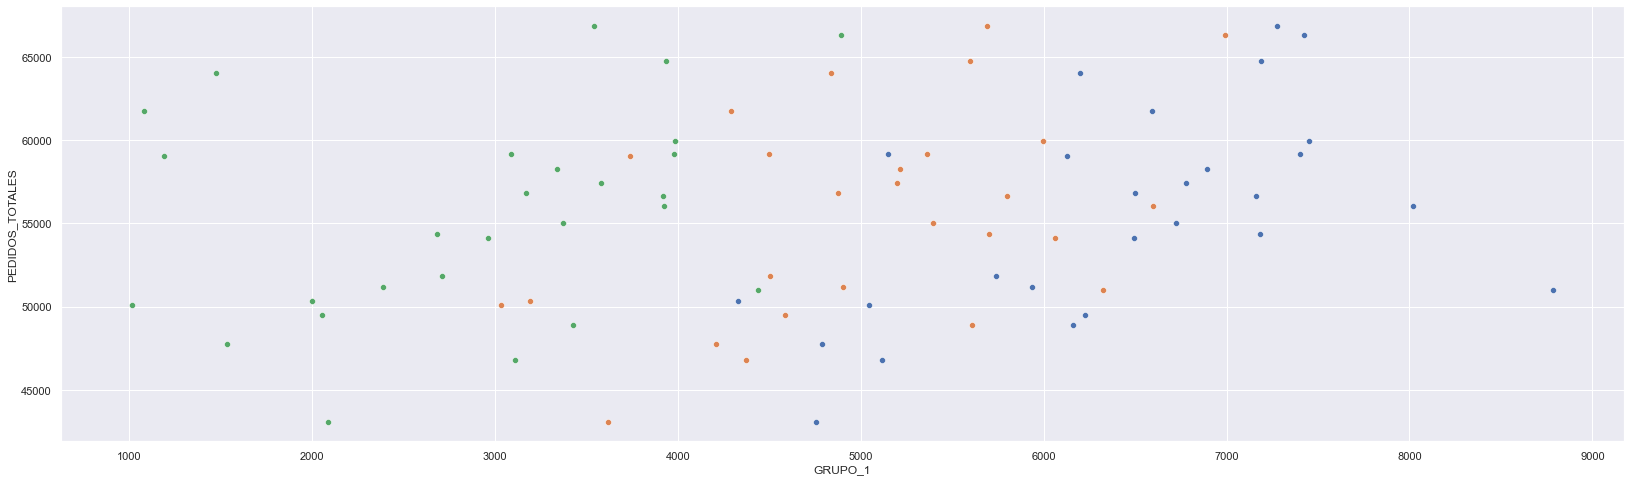

In [218]:
for i in range(1,4):
    sns.scatterplot(data=df, x = f'GRUPO_{i}', y = 'PEDIDOS_TOTALES')

In [246]:
## Se aplica un Modelo de Regresion Lineal para hallar los coeficientes de la ecuacion
X = df.iloc[:,1:4]
X
y =df['PEDIDOS_TOTALES']
X_train, X_test, y_train,y_test = train_test_split(X,y)

lin = LinearRegression()
lin.fit(X_train,y_train)
y_pred = lin.predict(X_test)
coef = lin.coef_

In [245]:
coef

array([ 3.31296611,  2.8937441 , -2.90685382])

In [242]:
print(X.shape)
print(y_pred)

(27, 3)
[61180.53745093 49186.67276505 53833.4819137  69038.73053089
 61908.12853697 58849.00969022 64707.68665418]


ValueError: x and y must have same first dimension, but have shapes (2,) and (7,)

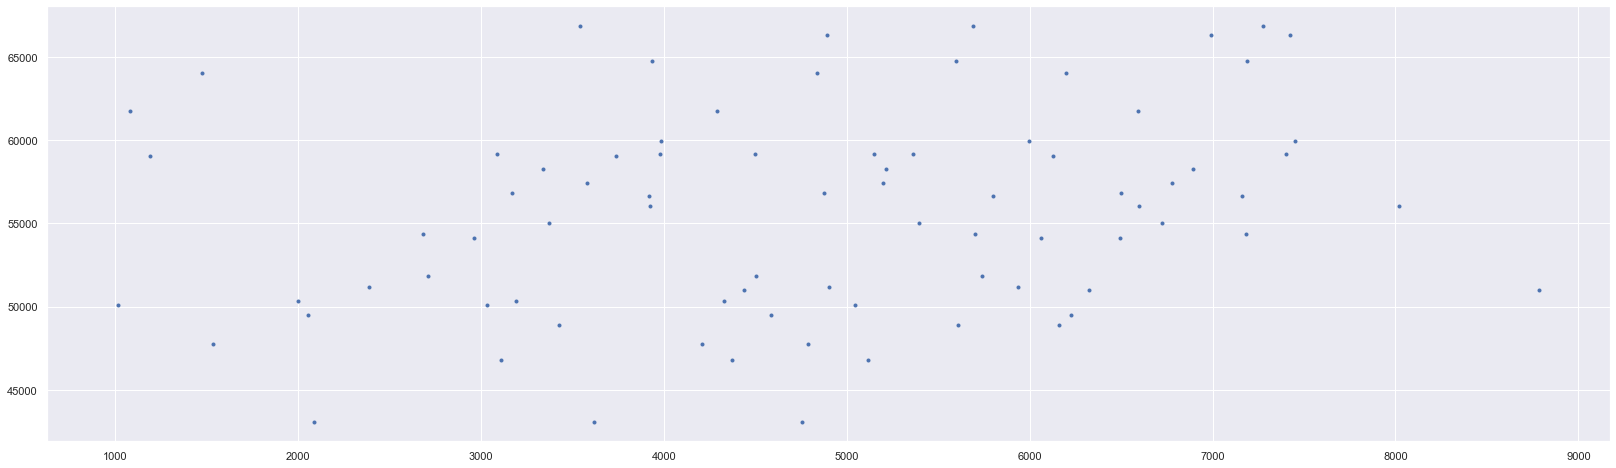

In [243]:
plt.plot(X,y,"b.")
plt.plot(X,y_pred)
plt.plot(X)
plt.show()

ValueError: all the input array dimensions for the concatenation axis must match exactly, but along dimension 0, the array at index 0 has size 100 and the array at index 1 has size 27

In [247]:
## Ecuacion de la recta ## y = mx1x1 + ... m10x10 + b 

ecuacion = pd.DataFrame((zip)(X.columns,coef), columns =['grupo','coeficiente m'])
ecuacion = ecuacion.append({'grupo':'intercepto b','coeficiente m':lin.intercept_},ignore_index=True)
print(ecuacion)

ecuacion.to_excel("ecuacion.xlsx")

          grupo  coeficiente m
0       GRUPO_1       2.010321
1       GRUPO_2       2.795433
2       GRUPO_3      -1.647341
3  intercepto b   33579.575280


### Modelo 2:

Y = Pedidos totales

t = Campña (201901 - 202009)


Outcome: predecir las ventas futuras en funcion a las ventas de campañas pasadas. 

<AxesSubplot:xlabel='CAMPAÑA', ylabel='PEDIDOS_TOTALES'>

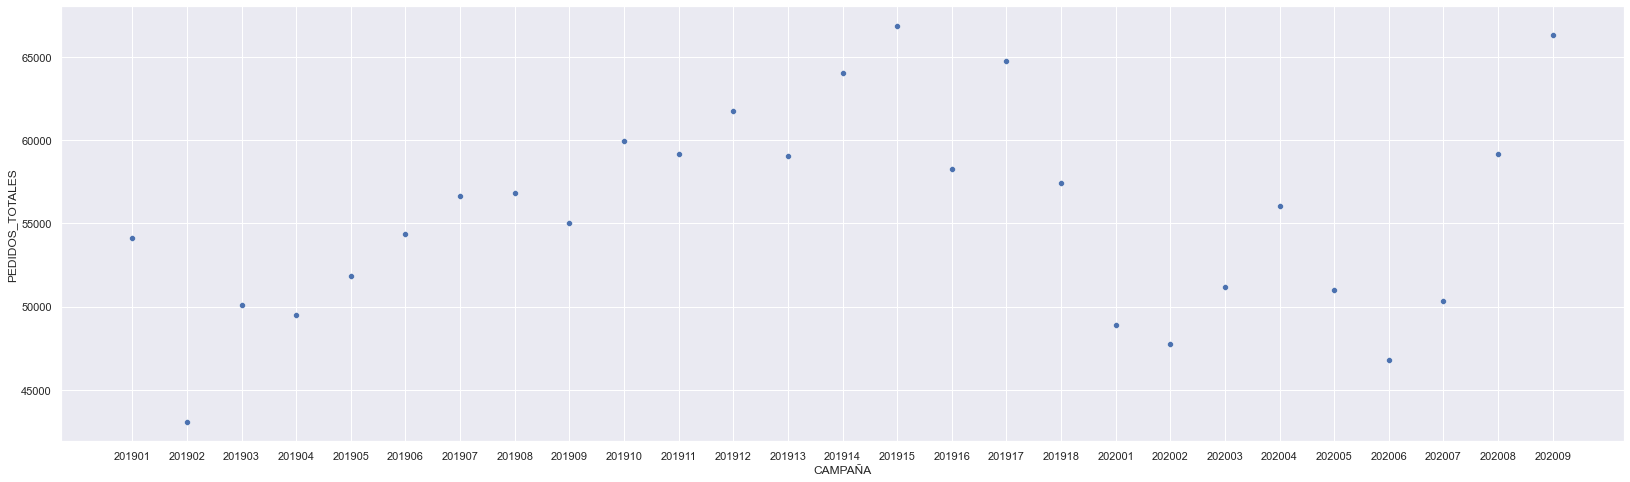

In [219]:
sns.scatterplot(data=df, x='CAMPAÑA', y= 'PEDIDOS_TOTALES',palette='Set2' ) 